In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the csv file
data = pd.read_csv("cost_revenue_dirty.csv")
data

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
#Print the column names
data.columns

Index(['Rank', 'Release Date', 'Movie Title', 'Production Budget ($)',
       'Worldwide Gross ($)', 'Domestic Gross ($)'],
      dtype='object')

In [4]:
#Drop unnecessary data columns
data = data.drop('Rank', axis=1) #Axis 1 is for columns
data = data.drop('Release Date', axis=1)
data = data.drop('Domestic Gross ($)', axis=1)
data = data.drop('Movie Title', axis=1)

In [5]:
#Print data head
data.head

<bound method NDFrame.head of      Production Budget ($) Worldwide Gross ($)
0                 $110,000         $11,000,000
1                 $385,907                  $0
2                 $200,000          $8,000,000
3                 $100,000          $3,000,000
4                 $245,000         $22,000,000
...                    ...                 ...
5386           $15,000,000                  $0
5387          $160,000,000                  $0
5388          $175,000,000                  $0
5389           $50,000,000                  $0
5390           $20,000,000                  $0

[5391 rows x 2 columns]>

In [6]:
#Print description of data
##Shows how many rows, columns, entries, unique entries etc a dataframe has
data.describe(include='all')

,Production Budget ($),Worldwide Gross ($)
count,5391,5391
unique,484,4969
top,"$20,000,000",$0
freq,216,357


In [7]:
#Rename data columns
data.rename(columns={"Production Budget ($)":"production_budget_usd"}, inplace=True)
data.rename(columns={"Worldwide Gross ($)":"worldwide_gross_usd"}, inplace=True)

In [8]:
data.head()

,production_budget_usd,worldwide_gross_usd
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"


***CONVERT SERIES TO DATAFRAME***

In [9]:
y = data.worldwide_gross_usd
y = y.to_frame()

In [10]:
#Check type of data
type(X)

NameError: name 'X' is not defined

In [ ]:
type(y)

***REPLACE "$" FROM COLUMNS:***

In [11]:
#Second, if regex=True then all of the strings in both lists will be interpreted as regexs otherwise they will match directly
data["production_budget_usd"] = data['production_budget_usd'].str.replace('\$|,','', regex=True)

In [12]:
data['worldwide_gross_usd'] = data['worldwide_gross_usd'].str.replace('\$|,','', regex=True)

In [13]:
data

,production_budget_usd,worldwide_gross_usd
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [14]:
type(data['worldwide_gross_usd'][0])

str

***CONVERT ALL ENTRIES IN THE COLUMNS TO INTEGERS:***

In [15]:
#Convert to int
data["production_budget_usd"] = data["production_budget_usd"].astype(int)

In [16]:
data["worldwide_gross_usd"] = pd.to_numeric(data["worldwide_gross_usd"])

In [17]:
#Check the datatypes
data.dtypes

production_budget_usd    int32
worldwide_gross_usd      int64
dtype: object

In [18]:
data

,production_budget_usd,worldwide_gross_usd
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


***CREATE A SCATTER PLOT USING MATPLOTLIB(plt)***

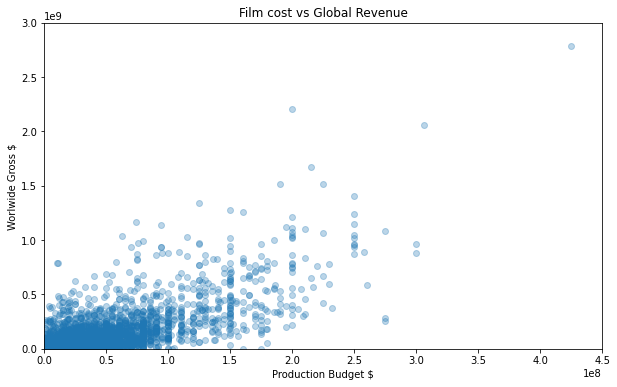

In [25]:
#Make the size of the chart larger:
plt.figure(figsize=(10,6)) #Width=10, Height=6




#Putting X, y inside the bracket does not work
plt.scatter(data["production_budget_usd"], data["worldwide_gross_usd"], alpha=0.3) #Add transparency:alpha=0.3
plt.title("Film cost vs Global Revenue") #Add a title
plt.xlabel("Production Budget $") #Label x axis
plt.ylabel("Worlwide Gross $") #Label y axis

#To make the xaxis and yaxis start from 0:
#We set a range for both the axes:
plt.ylim(0,3000000000) #Start=0, End=3billion
plt.xlim(0,450000000)

plt.show()